In [24]:
from typing_extensions import TypedDict,List
import random
from langgraph.graph import StateGraph, START,END

In [25]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [26]:
def greeting_node(state:AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state


def random_node(state:AgentState)-> AgentState:
    """Generates a random number from 0 to 10"""
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def should_continue(state:AgentState) -> AgentState:
    """determine when to stop"""
    if state['counter'] < 5:
        print("ENTERING LOOP",state['counter'])
        return "loop" # edge
    else:
        return "exit"


In [27]:
# greeting -> random -> random -> random -> random -> random -> END

In [28]:
graph_builder = StateGraph(AgentState)

graph_builder.add_node("greeting_node",greeting_node)
graph_builder.add_node("random_node",random_node)
graph_builder.add_edge("greeting_node","random_node")

graph_builder.add_conditional_edges(
    "random_node",               # Source node
    should_continue,        # Action
    {
        "loop": "random_node",
        "exit": END         # End of the graph
    }
)

graph_builder.add_edge(START,"greeting_node")

app = graph_builder.compile()

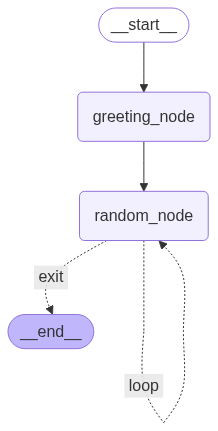

In [29]:
from IPython.display import display,Image
from langchain_core.runnables.graph import CurveStyle

display(Image(app.get_graph().draw_mermaid_png(padding=50,curve_style=CurveStyle.NATURAL)))

In [32]:
result = app.invoke({
    'name': 'aman',
    'number': [],
})
result

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, aman', 'number': [3, 1, 2, 9, 9], 'counter': 5}